# Eng. Abdallah Dwikat, Elevvopath Intern, 9th of September 2025.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Load Data

In [48]:
df = pd.read_csv(r"C:\Users\hp\Elevvopath\4) Loan_Approval_Prediction\loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [49]:
df.columns = df.columns.str.strip()
df[['education', 'self_employed', 'loan_status']] = df[['education', 'self_employed', 'loan_status']].apply(lambda x: x.str.strip())

In [35]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

## Data Preprocessing

In [36]:
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_5100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


In [10]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [17]:
df.describe().round(1)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0
mean,2135.0,2.5,5059123.9,15133450.5,10.9,599.9,7472616.5,4973155.3,15126305.9,4976692.4
std,1232.5,1.7,2806839.8,9043363.0,5.7,172.4,6503636.6,4388966.1,9103753.7,3250185.3
min,1.0,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
25%,1068.0,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
50%,2135.0,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
75%,3202.0,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,4269.0,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


In [38]:
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_status'].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
['Approved' 'Rejected']


In [39]:
df1 = df
df1['education'] = df1['education'].map({'Graduate': 1, 'Not Graduate': 0})
df1['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df1['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [40]:
df1.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685
no_of_dependents,0.005326,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.015536,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.001745,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.012592,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,0.008170,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,0.009809,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,0.016323,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.020936,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,0.018595,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


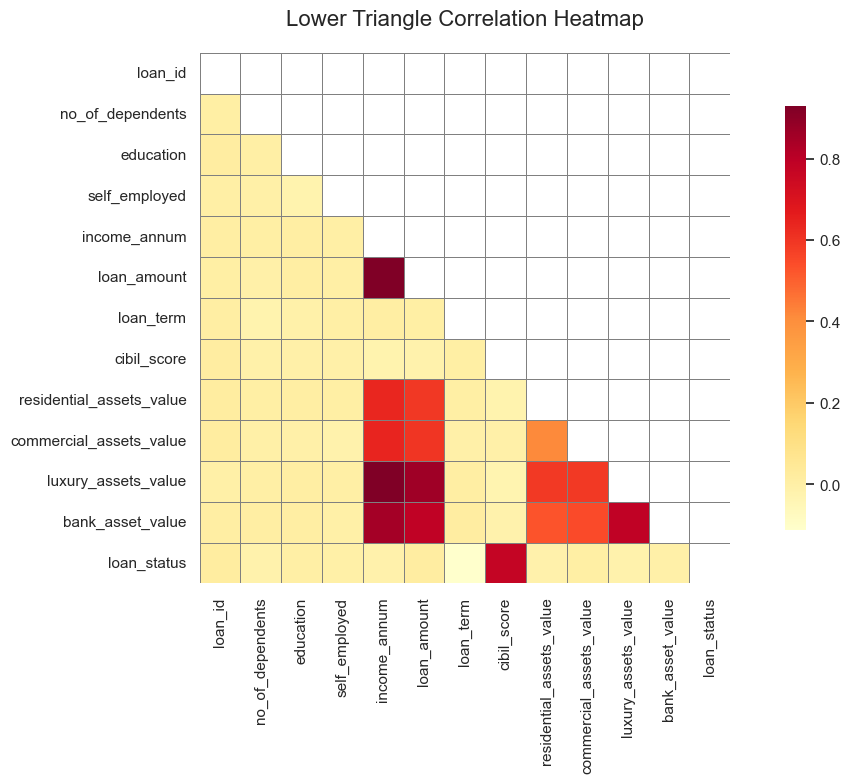

In [42]:
# Compute the correlation matrix
corr = df1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap="YlOrRd",         # Warm color palette: yellow to red
    annot=True,            # Show correlation values
    fmt=".2f",             # Format to 2 decimal places
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Add title
plt.title("Lower Triangle Correlation Heatmap", fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 10


In [52]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))

Categorical Columns: 3


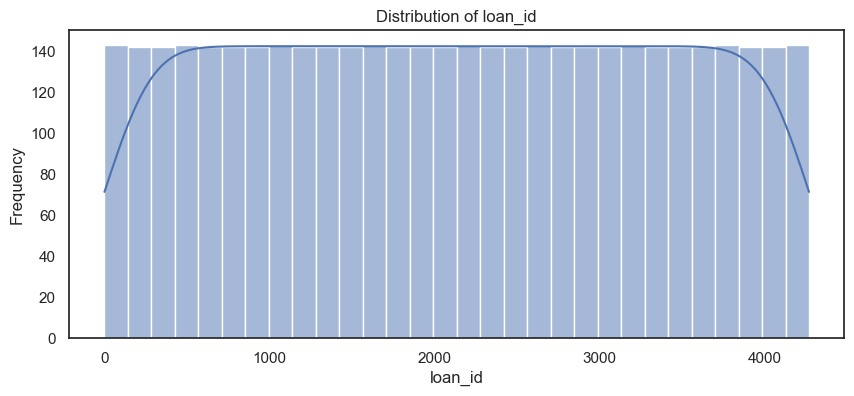

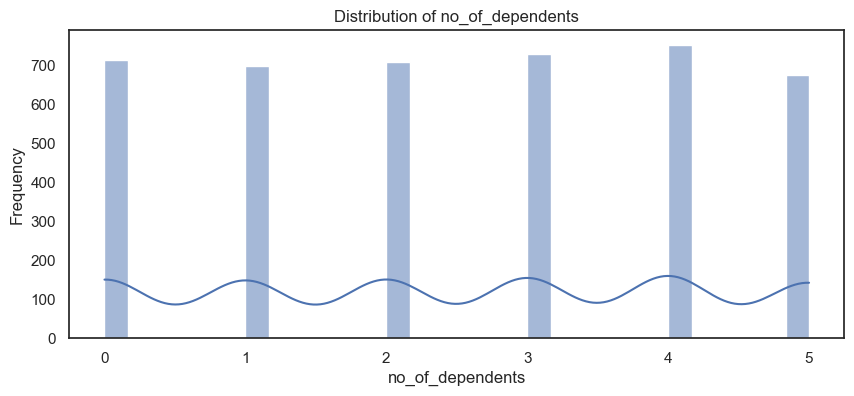

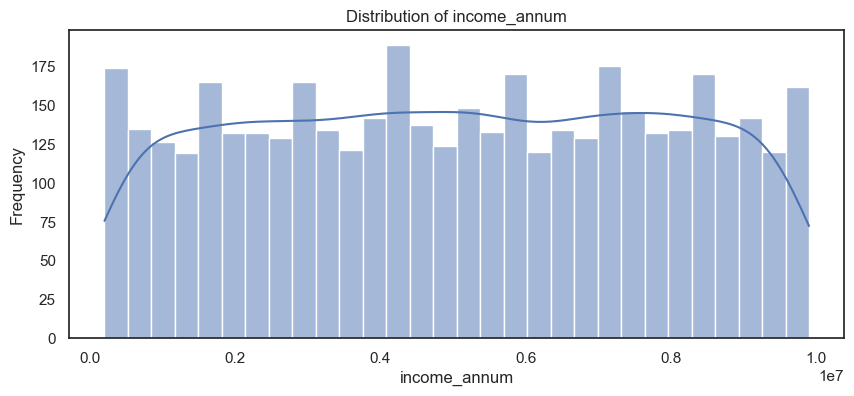

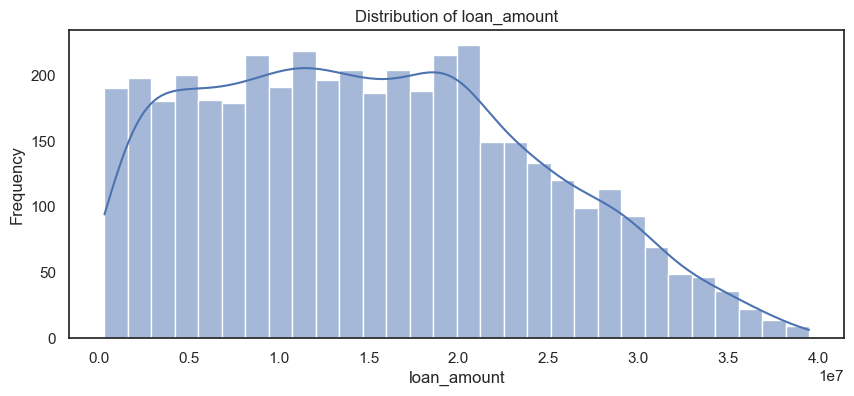

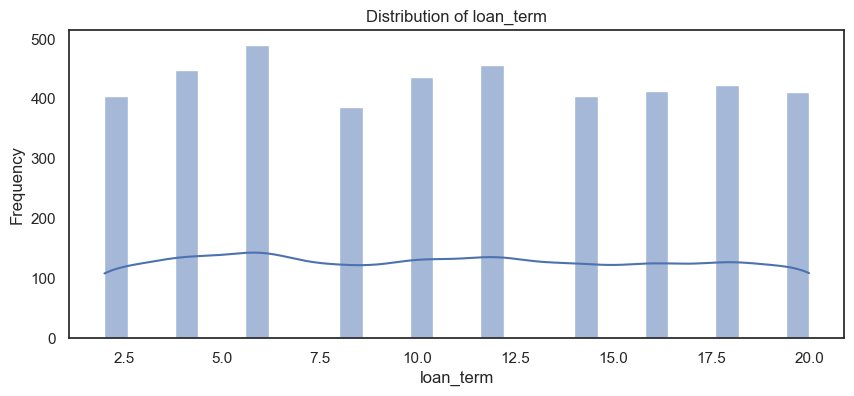

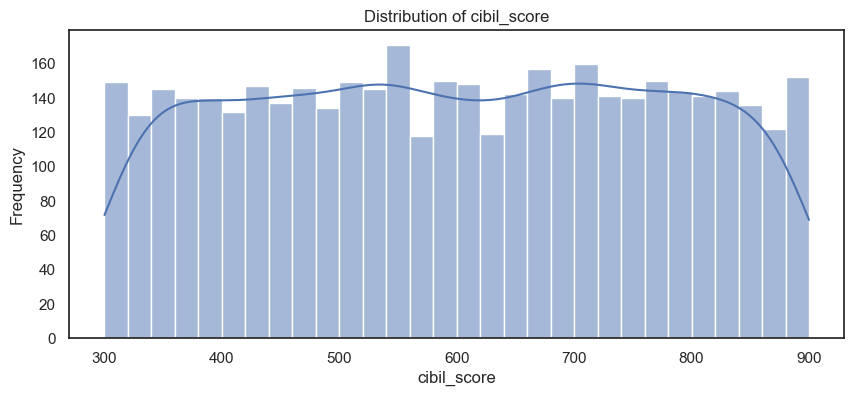

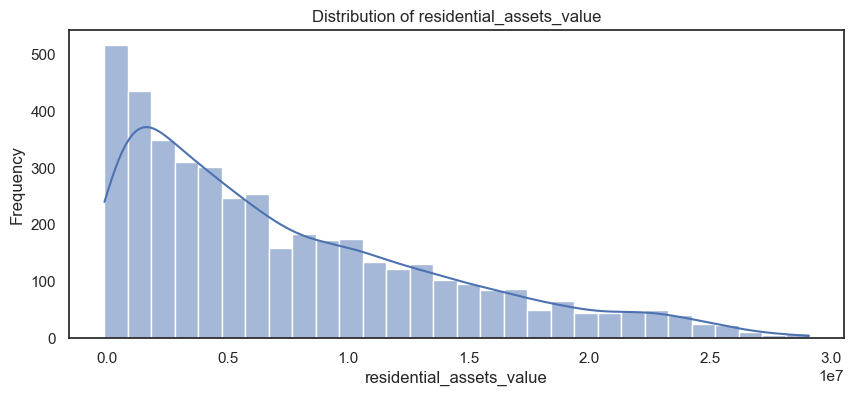

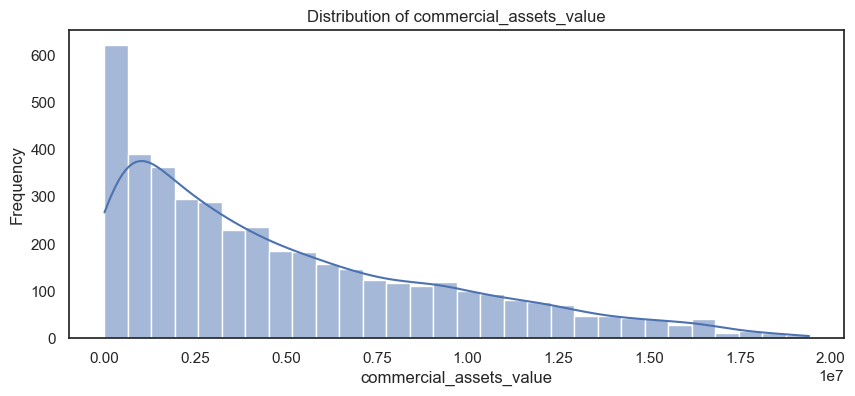

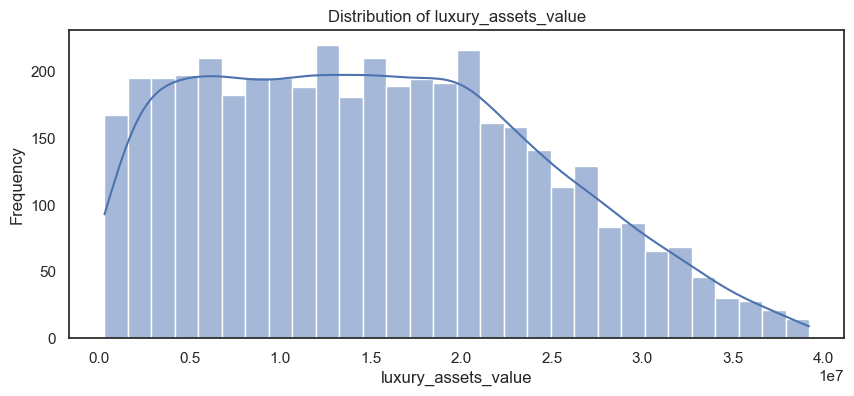

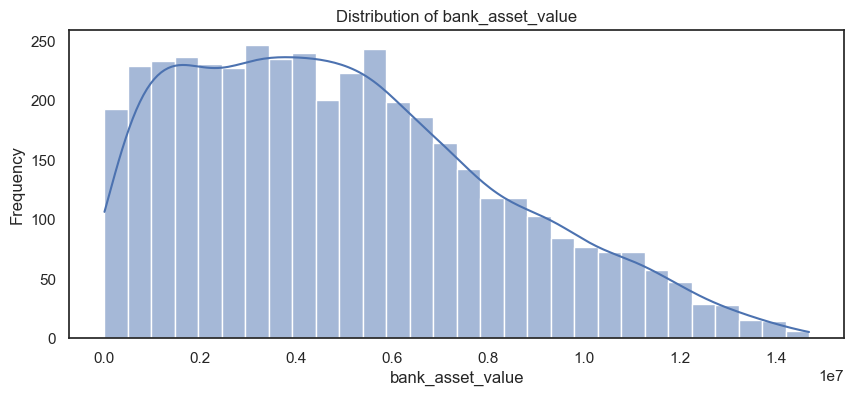

In [54]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Data Over Sampling

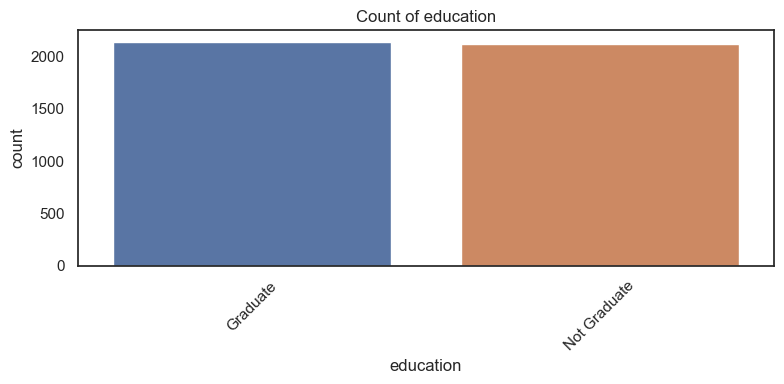

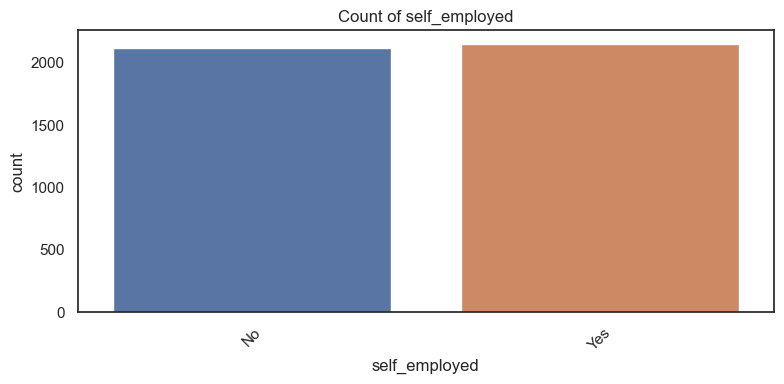

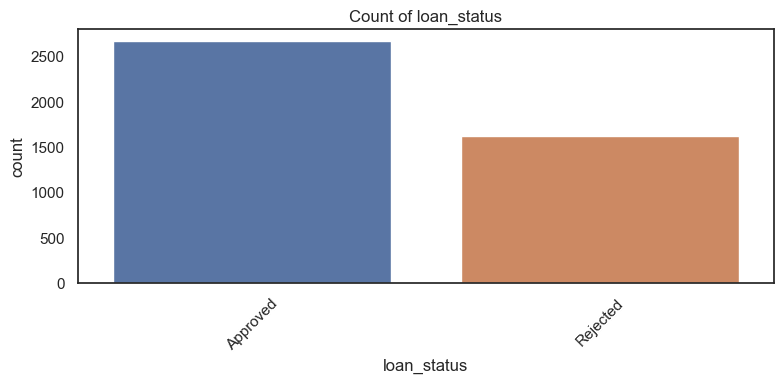

In [56]:
categorical_cols = ['education', 'self_employed', 'loan_status']  # or whatever you're looping over

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [58]:
# Step 1: Strip column names (if needed)
df.columns = df.columns.str.strip()

# Step 2: Separate majority and minority classes
majority = df[df['loan_status'] == 'approved']
minority = df[df['loan_status'] == 'rejected']

# Step 3: Oversample minority class
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state=42)

# Step 4: Combine back into a balanced DataFrame
df_balanced = pd.concat([majority, minority_oversampled], axis=0).reset_index(drop=True)

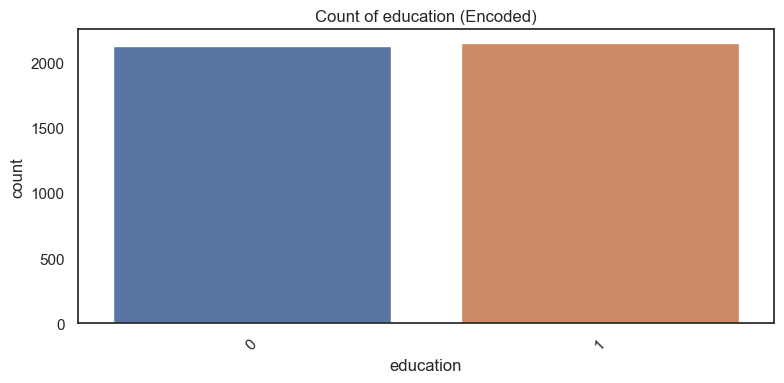

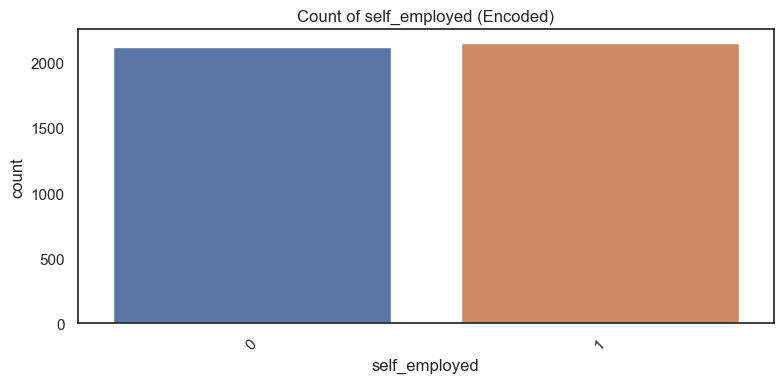

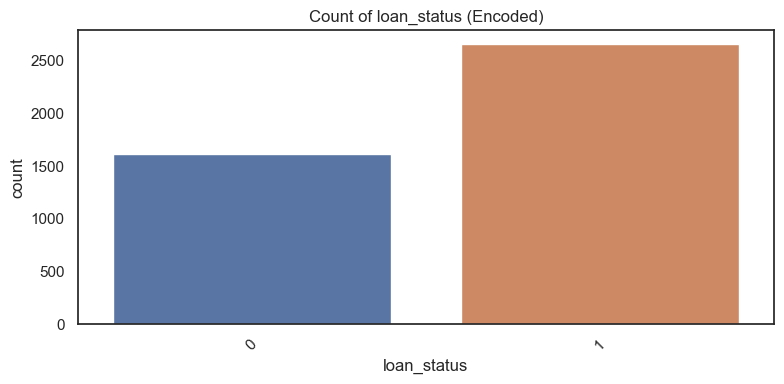

In [66]:
categorical_cols = ['education', 'self_employed', 'loan_status']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x=col)
    plt.title(f'Count of {col} (Encoded)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [68]:
# Step 1: Separate majority and minority classes
majority = df1[df1['loan_status'] == 1]
minority = df1[df1['loan_status'] == 0]

# Step 2: Oversample the minority class
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state=42)

# Step 3: Combine into a balanced DataFrame
df1_balanced = pd.concat([majority, minority_oversampled], axis=0).reset_index(drop=True)

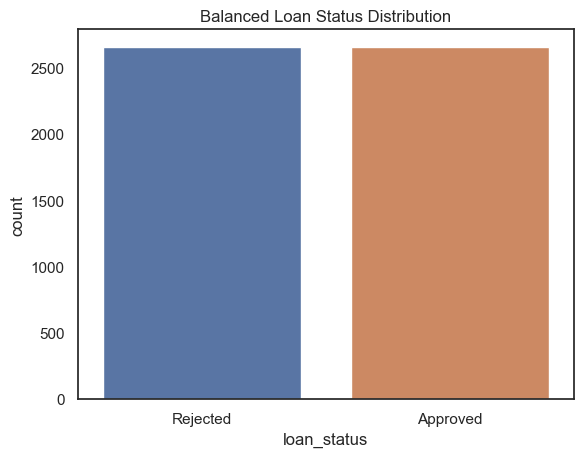

In [69]:
sns.countplot(data=df1_balanced, x='loan_status')
plt.title('Balanced Loan Status Distribution')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

In [71]:
df1_balanced.shape

(5312, 13)

In [72]:
data = df1_balanced
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,7,5,1,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1
2,9,0,1,1,800000,2200000,20,782,1300000,800000,2800000,600000,1
3,11,4,1,1,2900000,11200000,2,547,8100000,4700000,9500000,3100000,1
4,14,2,1,1,9100000,31500000,14,679,10800000,16600000,20900000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,4085,0,0,1,9300000,29400000,10,351,24200000,6800000,35800000,6100000,0
5308,160,3,1,1,4000000,10600000,10,318,1500000,5100000,8000000,4900000,0
5309,1038,3,1,1,7800000,27700000,6,430,2000000,8000000,26100000,5300000,0
5310,3734,1,1,0,9400000,26700000,10,343,7600000,2500000,28600000,13200000,0


## Train Test Split

In [73]:
X = data.drop(columns=['loan_id', 'loan_status'])
y = data['loan_status']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building and Error Metrics

In [79]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [80]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')

Accuracy: 98.68%


In [82]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [83]:
print(f'ROC score: {roc_auc_score(y_test,y_pred)*100:.2f}')

ROC score: 98.70


In [84]:
print(f'Precision score:{precision_score(y_test,y_pred):.2f}')

Precision score:0.99


In [85]:
print(f'Recall score: {recall_score(y_test,y_pred):.2f}')

Recall score: 0.98


In [86]:
print(f'F1-score: {f1_score(y_test,y_pred):.2f}')

F1-score: 0.99


## Confusion Matrix

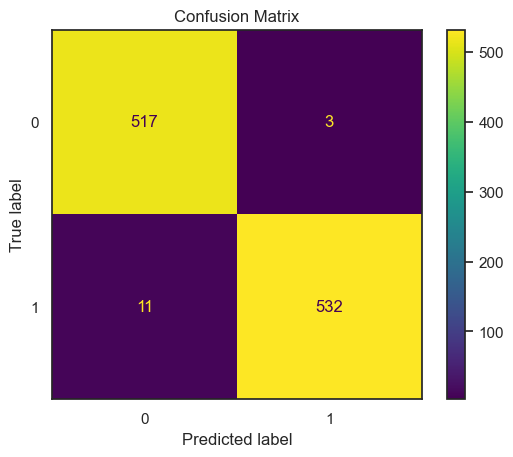

In [88]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()